In [4]:
import swan_vis as swan

In [2]:
data_dir = '/Users/fairliereese/mortazavi_lab/data/200428_swan_paper/hffc6_hepg2/take2/'
ab_file = data_dir+'all_talon_abundance_filtered.tsv'
ref_gtf = '/Users/fairliereese/mortazavi_lab/ref/gencode.v29/gencode.v29.annotation.gtf'
hep_1_gtf = data_dir+'hepg2_1_talon.gtf'
hep_2_gtf = data_dir+'hepg2_2_talon.gtf'
hff_1_gtf = data_dir+'hffc6_1_talon.gtf'
hff_2_gtf = data_dir+'hffc6_2_talon.gtf'
hff_3_gtf = data_dir+'hffc6_3_talon.gtf'

In [3]:
# add data to the SwanGraph
sg = swan.SwanGraph()
sg.add_annotation(ref_gtf)
sg.add_dataset('HepG2_1', hep_1_gtf,
	counts_file=ab_file,
	count_cols='hepg2_1')
sg.add_dataset('HepG2_2', hep_2_gtf,
	counts_file=ab_file,
	count_cols='hepg2_2')
sg.add_dataset('HFFc6_1', hff_1_gtf,
	counts_file=ab_file,
	count_cols='hffc6_1')
sg.add_dataset('HFFc6_2', hff_2_gtf,
	counts_file=ab_file,
	count_cols='hffc6_2')
sg.add_dataset('HFFc6_3', hff_3_gtf,
	counts_file=ab_file,
	count_cols='hffc6_3')

# save graph for good measure
sg.save_graph('swan')

Adding dataset annotation to the SwanGraph.
Adding dataset HepG2_1 to the SwanGraph.
Adding dataset HepG2_2 to the SwanGraph.
Adding dataset HFFc6_1 to the SwanGraph.
Adding dataset HFFc6_2 to the SwanGraph.
Adding dataset HFFc6_3 to the SwanGraph.
Saving graph as swan.p


In [4]:
# de gene and transcript tests
dataset_groups=[['HepG2_1', 'HepG2_2'], ['HFFc6_1', 'HFFc6_2', 'HFFc6_3']]

sg.de_gene_test(dataset_groups)
sg.de_transcript_test(dataset_groups)

de_gids, _ = sg.get_de_genes()
print('Found {} differentially expressed genes'.format(len(de_gids)))

de_tids, _ = sg.get_de_transcripts()
print('Found {} differentially expressed transcripts'.format(len(de_tids)))

is_gids, _ = sg.find_isoform_switching_genes()
print('Found {} isoform switching genes'.format(len(is_gids)))

# save graph for good measure
sg.save_graph('swan')

Transforming to str index.


training location model: False
training scale model: True
iter   0: ll=76839008.205068
iter   1: ll=76839008.205068, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=3994961.414960, converged: 1.20% (loc: 1.20%, scale update: True), in 111.63sec
iter   3: ll=3994961.414960, converged: 1.20% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2972738.740537, converged: 15.96% (loc: 15.96%, scale update: True), in 89.05sec
iter   5: ll=2972738.740537, converged: 15.96% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2919018.652501, converged: 21.45% (loc: 21.45%, scale update: True), in 83.04sec
iter   7: ll=2919018.652501, converged: 21.45% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2746114.113052, converged: 24.10% (loc: 24.10%, scale update: True), in 74.21sec
iter   9: ll=2746114.113052, converged: 24.10% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=2745964.853568, converged: 99.88% (loc: 99.88%, sca

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/dask/array/core.py:2622: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))
Transforming to str index.


training location model: False
training scale model: True
iter   0: ll=292114902.725192
iter   1: ll=292114902.725192, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=9689621.464688, converged: 0.64% (loc: 0.64%, scale update: True), in 440.85sec
iter   3: ll=9689621.464688, converged: 0.64% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=6067450.782106, converged: 8.86% (loc: 8.86%, scale update: True), in 374.06sec
iter   5: ll=6067450.782106, converged: 8.86% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=5861723.183757, converged: 13.56% (loc: 13.56%, scale update: True), in 340.69sec
iter   7: ll=5861723.183757, converged: 13.56% (loc: 100.00%, scale update: False), in 0.01sec
iter   8: ll=5184440.659661, converged: 15.97% (loc: 15.97%, scale update: True), in 303.59sec
iter   9: ll=5184440.659661, converged: 15.97% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=5184122.283550, converged: 99.89% (loc: 99.89%, s

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/dask/array/core.py:2622: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Found 4009 differentially expressed genes
Found 4909 differentially expressed transcripts
Found 279 isoform switching genes
Saving graph as swan.p


In [8]:
sg = swan.SwanGraph('/Users/fairliereese/mortazavi_lab/data/200428_swan_paper/hffc6_hepg2/take2/swan.p')
is_gids, _ = sg.find_isoform_switching_genes()
print('Found {} isoform switching genes'.format(len(is_gids)))


Graph from /Users/fairliereese/mortazavi_lab/data/200428_swan_paper/hffc6_hepg2/take2/swan.p loaded
Found 279 isoform switching genes


In [9]:
# exon skipping and intron retention detection
es_gids = sg.find_es_genes()
print('Found {} novel exon-skipping genes'.format(len(es_gids)))
ir_gids = sg.find_ir_genes()
print('Found {} novel intron-retaining genes'.format(len(ir_gids)))

Analyzing 893 intronic edges for ES
Found 1021 novel es events from 285 genes.
Found 285 novel exon-skipping genes
Analyzing 2185 exonic edges for IR
Found 73 novel ir events from 47 genes.
Found 47 novel intron-retaining genes


In [10]:
# find genes that have exon skipping or intron retention and are
# isoform switching
ir_es_gids = list(set(ir_gids+es_gids))
cool_gids = list(set(is_gids)&set(ir_es_gids))
print(cool_gids)

['ENSG00000111237.18', 'ENSG00000185624.14', 'ENSG00000133835.15', 'ENSG00000140319.10', 'ENSG00000016864.18', 'ENSG00000100239.15', 'ENSG00000130706.12', 'ENSG00000147586.9', 'ENSG00000100284.20', 'ENSG00000137161.16', 'ENSG00000182149.20', 'ENSG00000129084.17', 'ENSG00000169813.16', 'ENSG00000274487.2', 'ENSG00000197746.13', 'ENSG00000229833.9', 'ENSG00000108946.14', 'ENSG00000156411.9', 'ENSG00000177600.8', 'ENSG00000108219.14', 'ENSG00000164733.20', 'ENSG00000111669.14', 'ENSG00000143429.10', 'ENSG00000143742.12', 'ENSG00000196704.11', 'ENSG00000089022.13', 'ENSG00000168175.14', 'ENSG00000213719.8', 'ENSG00000128739.22', 'ENSG00000143977.13', 'ENSG00000075415.12', 'ENSG00000100138.14', 'ENSG00000165119.20', 'ENSG00000120265.17', 'ENSG00000042493.15', 'ENSG00000145907.14', 'ENSG00000102897.9', 'ENSG00000101363.12', 'ENSG00000116251.10', 'ENSG00000215021.8', 'ENSG00000159352.15']


In [11]:
# create gene report for ADRM1
sg.gen_report('ADRM1',
              'adrm1_paper',
              heatmap=True,
              novelty=True,
              include_qvals=True,
              indicate_novel=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as adrm1_paper_novel_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as adrm1_paper_novel_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as adrm1_paper_novel_TALONT000301927_path.png
Saving transcript path graph for TALONT000301961 as adrm1_paper_novel_TALONT000301961_path.png
Saving transcript path graph for TALONT000301953 as adrm1_paper_novel_TALONT000301953_path.png
Generating report for ENSG00000130706.12


In [12]:
# this is just to display saved images
from IPython.display import display, Image

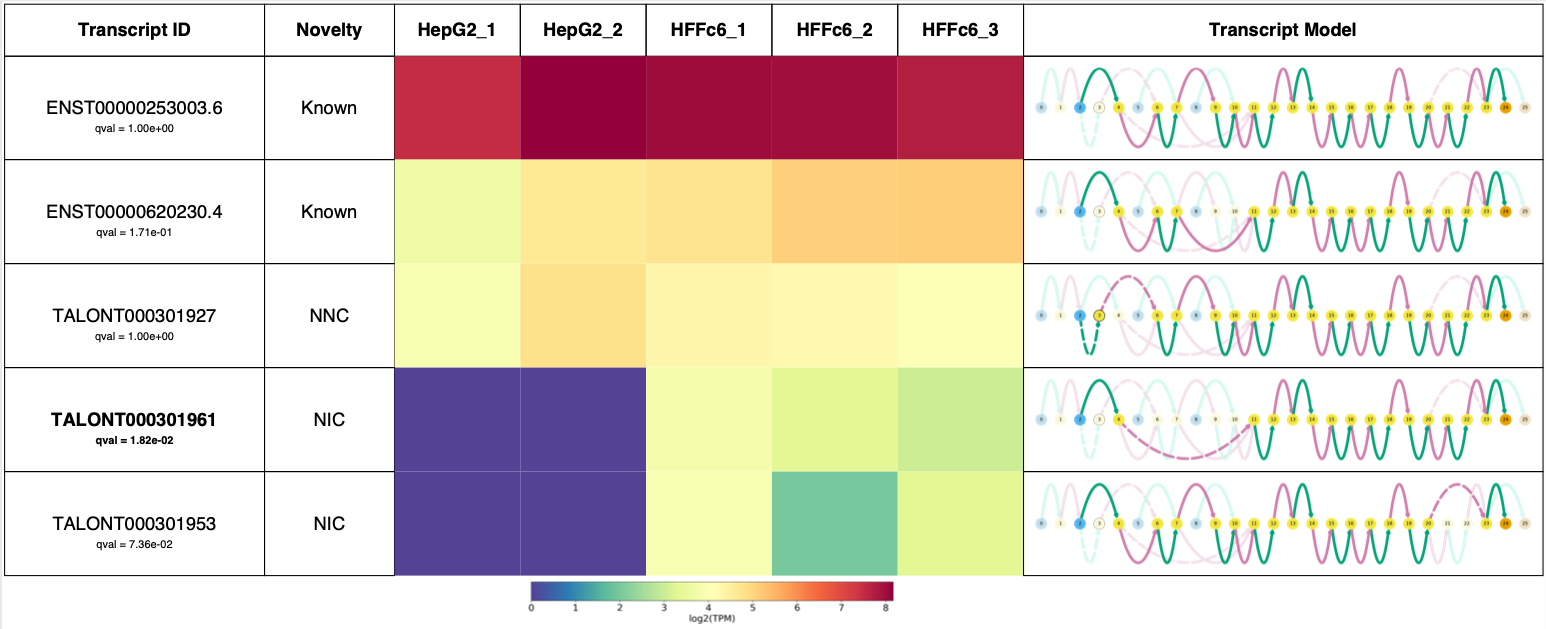

In [13]:
display(Image(filename='report.png'))